In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\jd\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

print(y_train)

[-2.22984299 -1.92765068 -1.17474748 -1.85036543 -2.08365001 -1.32630915
 -2.29982574 -1.35964265 -1.19579722 -0.91787216 -1.86193513 -1.4545273
 -1.65319927 -1.61924423 -1.65588279 -1.5791314  -1.12317636 -0.99076244
 -1.40728227 -1.47534532 -0.64568896 -0.9025504  -1.51107606 -0.87734646
 -1.29522502 -0.85029292 -0.68711002 -1.31217957 -1.08615865 -0.60669484
 -0.61461141 -0.4946777  -0.47802936 -0.28128114 -0.94903709 -1.06879248
 -0.53765326 -0.89049472 -0.58097564 -0.88239943 -0.52500976 -0.50147285
 -0.55166071  0.20860312  0.36885307 -0.66238475  0.27158609 -0.00716916
 -0.86316391  0.27732796  0.42676251 -0.08795568 -0.57672047  0.33992293
 -0.1106021   0.13627453  0.04160039  0.30557054  0.75634329 -0.01464375
  0.70921628  0.08155745  0.50980223 -0.11008965  0.55929374  0.49217237
  1.2400833   0.56538787  0.73808264  0.87341652  1.49433667  0.69989812
  0.55706602  1.51904381  1.23954821  1.23511073  0.87033292  1.13371176
  0.62934866  1.43555202  1.14667131  1.49773695  1.

In [3]:
learning_rate = 0.1
training_epochs = 100

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [5]:
cost_history = np.array([])

In [6]:
def model(X, w):
    return tf.multiply(X, w)

In [8]:
w = tf.Variable(0.0, name="weights")

y_model = model(X, w)
loss = tf.reduce_mean(tf.square(Y - y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epochs in range(training_epochs):
    for (x, y) in zip(x_train, y_train):
        cost_history = np.append(cost_history, sess.run(train_op, feed_dict={X: x, Y: y}))

w_val = sess.run(w)

print(cost_history)

[None None None ... None None None]


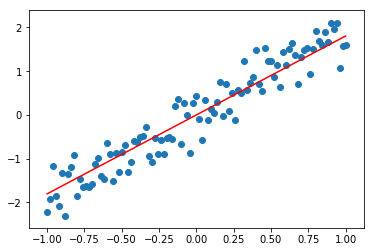

In [9]:
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.scatter(x_train, y_train)
plt.show()